In [61]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import gaussian_kde
import numpy as np
import pandas as pd

In [521]:
%matplotlib inline

In [6]:
% store -r final

In [192]:
# drop unessential columns
final = final.drop(['state', 'artist_followers', 'artist_genres', 'SQRT_artist_fol', 'time',
                    'artist_name2','other_artist_name1', 'other_artist_name2', 'total_pop', 'total_fol',
                    'mergeDay', 'mergeMonth', 'date_y', 'price', 'artist_name_y'
                         ], axis=1, inplace=False)

In [ ]:
# Problem:
# the resale of concert tickets on secondary market websites such as stubhub and seatgeek is an ongoing problem for artists
# bots buy up primary market tickets quickly for popular shows to resell for a profit. The industry is worth about $8 billion
# this takes money that could go to the artist and prevents real fans from getting reasonably priced tickets

# Background:
# artists have tried to deal with this in multiple ways 
# - Bruce Springstein uses Ticketmaster's verified ticket sale algorithm tries to predict who is a real fan
# - Eric Church has employees dedicated to finding patterns in resellers (returned 25k tickets on a 2017 tour)
# - Sam Marks actually pointed out to me that yesterday there was a WSJ article about how Taylor Swift recent Reputation tour has raised prices to lower the margins of ticket resellers, resulting in fewer sold out shows 
# BUT none of these solutions is perfect, some artists underprice their tickets for a reason (merch sales, goodwill with fans, presige of selling out shows...etc)


In [ ]:
# the basis for my webscraping project is - given that artists won't be able to prevent reselling any time soon:
# Analyzing primary vs. secondary market ticket sales data will equip artist better to make decisions such as ticket pricing, promotion of a show, choosing a venue, and number of shows per city 

#################

# results: quick summary of results

#################

# What I did:
# Scraped Bowery presents website - concert promotion and venue management organization

#################
# Results: Note - I haven't done any statistical analysis so these are more areas that seem to be worth looking into more than conclusions

# tickets will be marked up on resale websites even when primary is still available
# - check both as a fan, promote primary sale website to fans as an artist

# generally fall into two groups of markups - how to these two groups appear to differ in popularity, primary ticket price, sold out shows?
# - 0% slightly less popular (47 vs. 52), lower primary ticket price ($17 vs. $20), BUT sold out about the same number of shows (6%), 
# This may mean they can experiment with raising their prices
# both groups saw primary price increase with popularity loosely
# for concerts with a mark up, mark up generally decreased with popularity --> potentially driven by higher price price (likely related)
# 0-50% percentile of primary price sold out 8% , vs. 5% for 50-100% percentile - so sold out shows may be a trade off
# ^ this may mean indicate the Taylor Swift method could be effective for more artists

# Effect of having two concerts in a row in a city on resale price increase
# - for the nine artists that had two shows in the same city in this data set the mark up was 123% vs. 173% for all shows

# size of venue matters? 
# Seems that largest markups happened at venues around 1500-1750 people and 500-750 people in capacity
# - perhaps artists/venues should consider raising prices in these range of capacity venues

#################

# Next steps:
#


Text(0.5,1,'Artist Pop. Rank v. Mark Up')

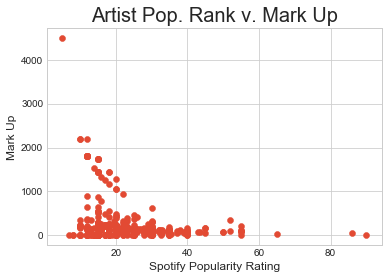

In [847]:
# while taking a first look at my data I identify outliers in artist_popularity and mark up
# eliminated four shows including "The Weeknd", "Incubus", "Ryan Shea Smith", "Zusha"
# not relevant to the bulk of the artists in my data set
plt.scatter(final['primary_price'], final['mark_up'])
plt.xlabel('Spotify Popularity Rating')
plt.ylabel('Mark Up')
plt.title('Artist Pop. Rank v. Mark Up', fontsize=20)

In [247]:
Outliers = final[(final['primary_price']>=60) | (final['mark_up']>=3000)]

In [248]:
Outliers

,button,date_x,venue,city,week_day,days_scrape_to_show,artist_name_x,artist_popularity,primary_price,secondary_price,mark_up,capacity
97,On_Sale,2018-09-16,Brooklyn Steel,Brooklyn,Sun,126,The Weeknd,94.0,65.0,90,38.4615,1800
125,On_Sale,2018-08-14,The National,Richmond,Tue,93,Incubus,72.0,86.0,132,53.4884,1500
285,On_Sale,2018-06-15,Great Scott,Allston,Fri,33,Ryan Shea Smith,2.0,5.0,230,4500,240
312,On_Sale,2018-06-10,Music Hall of Williamsburg,Brooklyn,Sun,28,Zusha,30.0,90.0,90,0,650


In [250]:
NoOutliers = final[(final['primary_price']<60) | (final['mark_up']<3000)]

Text(0.5,1,'Primary Price v. Secondary Price')

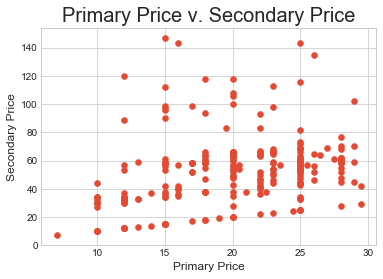

In [849]:
# I also discovered arbitrary common high values across some shows on seatgeek secondary price
plt.scatter(NoOutliers['primary_price'], NoOutliers['secondary_price'])
plt.xlabel('Primary Price')
plt.ylabel('Secondary Price')
plt.title('Primary Price v. Secondary Price', fontsize=20)

In [260]:
Above200 = NoOutliers[NoOutliers['secondary_price']>200]

Text(0.5,1,'Histogram of > $200 Secondary Price')

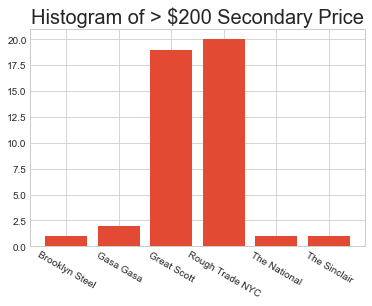

In [850]:
# most of these aritrary prices were at the venues Great Scott and Rough Trade NYC
Above200group = Above200.groupby('venue')
a2 = pd.DataFrame(Above200group.size())

a2 = pd.DataFrame(a2.reset_index())
a2.columns = ['venue', 'count']
plt.bar(a2['venue'], a2['count'])
plt.xticks(rotation=-30)
plt.title('Histogram of > $200 Secondary Price', fontsize=20)

Text(0.5,1,'Capacity of Concert Venue')

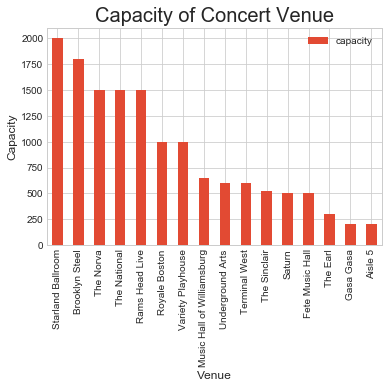

In [853]:
# Great Scott and Rough Trade NYC happen to be two of the smaller venues by capacity on the list
#group = NoOutliers.groupby('venue')['capacity']
x = NoOutliers[['capacity', 'venue']]
y = pd.DataFrame.drop_duplicates(x)
y =y.set_index('venue')
y.sort_values('capacity', ascending=False)[['capacity']].plot.bar(stacked=True, rot=90)

plt.ylabel('Capacity')
plt.xlabel('Venue')
plt.title('Capacity of Concert Venue', fontsize=20)

In [520]:
# this brought me to my first conclusion, don't trust resale website, artists should promote primary sale websites when still available 
# consumer should always check the primary seller first
# even tickets on sale were marked up 290% 
on_sale = NoOutliers[NoOutliers.button == "On_Sale"]
on_sale['mark_up'].mean()

289.8622448574684

In [528]:
# when I removed these seemingly arbitrary secondary price values (where secondary price is >$200 and primary <$30 the on_sale mark up fell to 140%  
NoOutliers = NoOutliers[(NoOutliers['secondary_price']<200) & (NoOutliers['primary_price']<30)]
on_sale = NoOutliers[NoOutliers.button == "On_Sale"]
on_sale['mark_up'].mean()

139.63393769394898

In [611]:
# removed Great Scott and Rough Trade NYC as they seem to be not indicative of other venues
len(NoOutliers[NoOutliers.venue == "Rough Trade NYC"]) # 24
len(NoOutliers[NoOutliers.venue == "Great Scott"]) # 33
NoOutliers = NoOutliers[(NoOutliers['venue'] != "Rough Trade NYC")]
NoOutliers = NoOutliers[(NoOutliers['venue'] != "Great Scott")]

In [612]:
NoOutliers.groupby('venue').size()

venue
Aisle 5                        5
Brooklyn Steel                12
Fete Music Hall               11
Gasa Gasa                     15
Music Hall of Williamsburg    19
Rams Head Live                10
Royale Boston                 14
Saturn                        27
Starland Ballroom              4
Terminal West                  7
The Earl                       6
The National                  20
The Norva                     20
The Sinclair                  50
Underground Arts              14
Variety Playhouse              6
dtype: int64

In [613]:
# as you would expect, this compares to much higher - 226% - for sold out shows
sold_out = NoOutliers[NoOutliers.button == "Sold Out"]
sold_out['mark_up'].mean()

226.42858004516478

Text(0.5,1,'Density Plot of % Price Increase')

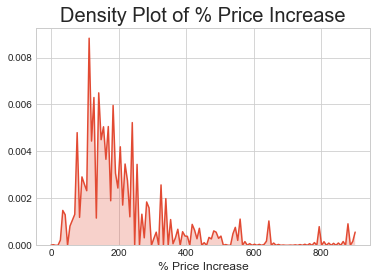

In [856]:
# first I took a look at the distribution of price mark up

data = NoOutliers['mark_up']
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.5, shade = True)
plt.xlabel('% Price Increase')
plt.title('Density Plot of % Price Increase', fontsize=20)


In [615]:
import math
NoOutliers['logMarkUp'] = [math.log(i+1) for i in NoOutliers.mark_up]

Text(0.5,1,'Density Plot of Log % Price Increase')

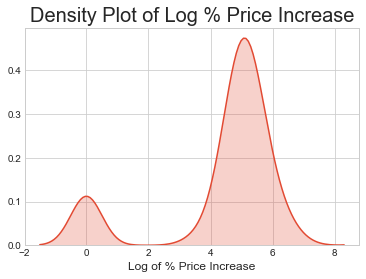

In [860]:
# taking a log of this data set made it much easier to interpret
# shows peak around 5 (~150) and around 0
# First conclusion - most tickets are either marked up 150% or not at all.
# The zero hump could be inflated - I assigned primary price as secondary price if it wasn't listed on Seatgeek

data = NoOutliers['logMarkUp']
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.5, shade = True)
plt.xlabel('Log of % Price Increase')
plt.title('Density Plot of Log % Price Increase', fontsize=20)

In [617]:
# looking at first group where mark up is less than 7.5% or e^2
lowMarkUp = NoOutliers[NoOutliers.mark_up < 7.5]

In [632]:
# char lowmarkup
lowMarkUp.artist_popularity.mean() # 47
lowMarkUp.primary_price.mean() # $17
lowMarkUp[lowMarkUp.button == "Sold Out"]['button'].count() /len(lowMarkUp.button) # sold out 6% of shows

0.058823529411764705

In [635]:
# char highmarkup
highMarkUp = NoOutliers[NoOutliers.mark_up > 7.5]
highMarkUp.artist_popularity.mean() # 52
highMarkUp.primary_price.mean() # $20
highMarkUp.secondary_price.mean() # $59
highMarkUp[highMarkUp.button == "Sold Out"]['button'].count() /len(highMarkUp.button) # sold out 6% of shows

0.063106796116504854

In [638]:
highMarkUp.groupby('city').size()
highMarkUp.groupby('venue').size()
max(highMarkUp.groupby('artist_name_x').size())

4

Text(0.5,1,'Artist Popularity Density Plot')

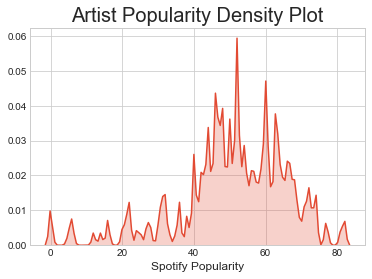

In [843]:
# density plot of artist popularity - peak around 50/100
data = NoOutliers['artist_popularity']
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.5, shade = True)
plt.xlabel('Spotify Popularity Rating')
plt.title('Artist Popularity Density Plot', fontsize=20)

Text(0.5,1,'Low Mark Up (Blue) & High Mark Up (Red)')

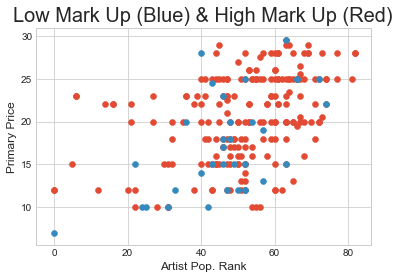

In [867]:
# generally primary price increased with artist popularity for both groups
plt.scatter(highMarkUp['artist_popularity'], highMarkUp['primary_price'])
plt.scatter(lowMarkUp['artist_popularity'], lowMarkUp['primary_price'])
plt.xlabel('Artist Pop. Rank')
plt.ylabel('Primary Price')
plt.title('Low Mark Up (Blue) & High Mark Up (Red)', fontsize=20)

Text(0.5,1,'Artist Pop. Rank v. Log of Mark Up')

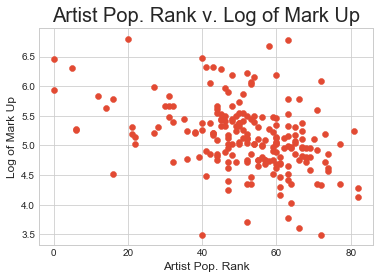

In [868]:
# for those that saw a mark up, it generally decreased with artist popularity 
# this could potentially be related to a higher starting price which we saw loosely in the previous chart - maybe Taylor swift is onto something
plt.scatter(highMarkUp['artist_popularity'], highMarkUp['logMarkUp'])
plt.xlabel('Artist Pop. Rank')
plt.ylabel('Log of Mark Up')
plt.title('Artist Pop. Rank v. Log of Mark Up', fontsize=20)

Text(0.5,1,'Primary Price v. Log of Mark Up')

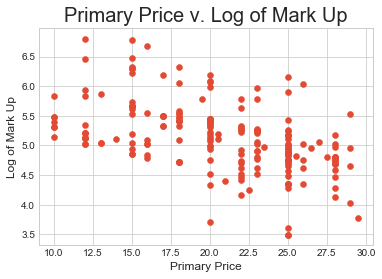

In [869]:
# in the same group there's a loose negative trend in mark up as primary price rises
plt.scatter(highMarkUp['primary_price'], highMarkUp['logMarkUp'])
plt.xlabel('Primary Price')
plt.ylabel('Log of Mark Up')
plt.title('Primary Price v. Log of Mark Up', fontsize=20)

In [651]:
highMarkUp['quantPrice'] = pd.qcut(highMarkUp['primary_price'], [0, .25, .5, .75, 1.], labels=None, retbins=False, precision=3, duplicates='raise')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [728]:
On_Sale = highMarkUp[highMarkUp['button']== "On_Sale"]
Sold_Out = highMarkUp[highMarkUp['button']== "Sold Out"]

In [734]:
buttonSO = On_Sale.groupby('quantPrice')['button'].size()
buttonSale = Sold_Out.groupby('quantPrice')['button'].size()

In [739]:
list(buttonSO) # [50, 46, 71, 26]
list(buttonSale) # [2, 6, 2, 3]

[2, 6, 2, 3]

In [742]:
# sold out/ total in 0-50th percentile vs. 50-100th percentile 
[8/104, 5/99]

[0.07692307692307693, 0.050505050505050504]

In [813]:
# Back to full data set - next I looked at artists who had more than one show in a city within a short period of time
cities = pd.DataFrame(NoOutliers.groupby('city').size())

cities = cities.reset_index()
citiesList = [i for i in cities.city]

In [824]:
def show_count(x):
    for i in citiesList:
        city = NoOutliers[NoOutliers.city == i]
        print(i)
        print(city.groupby('artist_name_x').size())
    return None

In [825]:
show_count(citiesList)
# Boston - Bishop Briggs        2, Yacht Rock Revue     2
# Brooklyn - Car Seat Headrest           2, Shame                       2, The Vaccines                2
# Cambridge - Wet                              2, dodie                            2
# Providence - Bent Knee         2, LANY              2

Atlanta
artist_name_x
Alex Cameron           1
Big Thief              1
Bruno Major            1
Calpurnia              1
Car Seat Headrest      1
Flasher                1
Gallant                1
HONNE                  1
Horse Feathers         1
Jesse Marchant         1
Joshua Hedley          1
Kimbra                 1
LUTHI                  1
Margo Price            1
Matthew Sweet          1
Natalie Prass          1
Okkervil River         1
Petit Biscuit          1
Robert Finley          1
Sons Of Kemet          1
Tank and The Bangas    1
The Fratellis          1
Tune-Yards             1
Young Rising Sons      1
dtype: int64
Baltimore
artist_name_x
Chris Robinson Brotherhood    1
Cold War Kids                 1
EDEN                          1
Kix                           1
LANY                          1
MisterWives                   1
Quinn XCII                    1
Streetlight Manifesto         1
The Wonder Years              1
They Might Be Giants          1
dtype: int64
Birmingh

In [836]:
print(NoOutliers[(NoOutliers['artist_name_x'] == "Bishop Briggs") & (NoOutliers['city'] == "Boston")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "Yacht Rock Revue") & (NoOutliers['city'] == "Boston")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "Car Seat Headrest") & (NoOutliers['city'] == "Brooklyn")].mark_up.mean())  
print(NoOutliers[(NoOutliers['artist_name_x'] == "Shame") & (NoOutliers['city'] == "Brooklyn")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "The Vaccines") & (NoOutliers['city'] == "Brooklyn")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "Wet") & (NoOutliers['city'] == "Cambridge")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "dodie") & (NoOutliers['city'] == "Cambridge")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "Bent Knee") & (NoOutliers['city'] == "Providence")].mark_up.mean())
print(NoOutliers[(NoOutliers['artist_name_x'] == "LANY") & (NoOutliers['city'] == "Providence")].mark_up.mean())

16.0
206.818181818
90.0
111.111111111
0.0
21.186440678
440.0
170.0
50.0


In [837]:
(16.0 + 206.818181818 + 90.0 + 111.111111111 + 0.0 + 21.186440678 + 440.0 + 170.0 + 50.0)/9 # 123% vs. 173% for the whole group


122.79063706744445

In [839]:
NoOutliers.mark_up.mean()

172.9416529705359

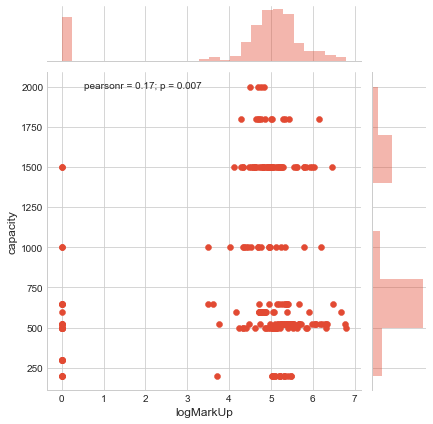

In [873]:
# Next I looked by size of the venue:
# Seems that largest markups happened at venues around 1500-1750 people and 500-750 people in capacity
sns.jointplot(NoOutliers['logMarkUp'], NoOutliers['capacity'])
